## Simple Linear Regression
單變量分析（np.polyfit方法）

In [1]:
# 單變量分析：溫度與銷售

import pandas as pd

data = pd.read_csv('Lemonade.csv')
data[:9]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18
5,06/01/2017,Friday,25.3,1.54,23,0.3,11
6,07/01/2017,Saturday,32.9,1.54,19,0.3,13
7,08/01/2017,Sunday,37.5,1.18,28,0.3,15
8,09/01/2017,Monday,38.1,1.18,20,0.3,17


In [2]:
X, y = data['Temperature'].values, data['Sales'].values

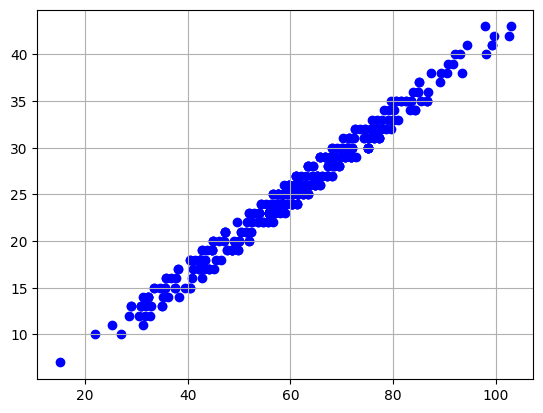

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color = 'blue')
plt.grid()
plt.show()

In [7]:
# 單變量分析 y = w0 + w1X
# w0 = Intercept
# w1 = Coefficients

import numpy as np

w1, w0 = np.polyfit(x = X, y = y, deg = 1)
print(w1, w0)

0.4213005561388709 -0.262814514725303


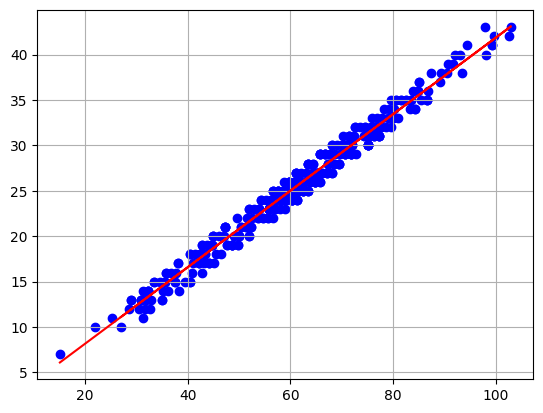

In [9]:
# 加上預測

import matplotlib.pyplot as plt

y_pred = w0 + w1 * X
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.grid()
plt.show()

## Simple Linear Regression
單變量分析（Machine Learning方法）

0.4213005561388711 -0.2628145147253207


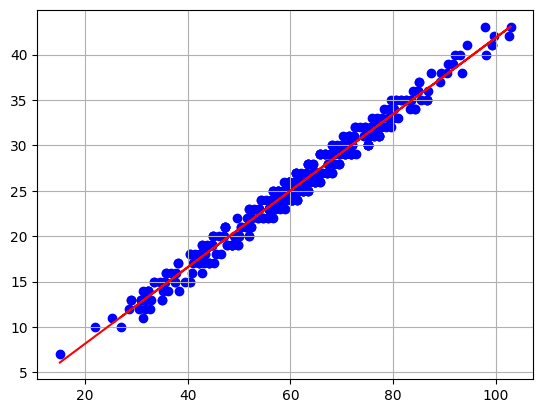

In [11]:
import pandas as pd
import numpy as np

data = pd.read_csv('Lemonade.csv')
X, y = data[['Temperature']].values, data['Sales'].values

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
w0, w1 = model.intercept_, model.coef_[0]
print(w1, w0)

import matplotlib.pyplot as plt

y_pred = w0 + w1 * X
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.grid()
plt.show()

## Multiple Linear Regression
多變量分析（Machine Learning）

In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('Lemonade.csv')
X, y = data[['Temperature', 'Rainfall', 'Flyers', 'Price']].values, data['Sales'].values

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
w0, w1 = model.intercept_, model.coef_
print(w1, w0)

[ 0.3692249  -2.24603381  0.01881911  2.41425811] 3.1919592172087583


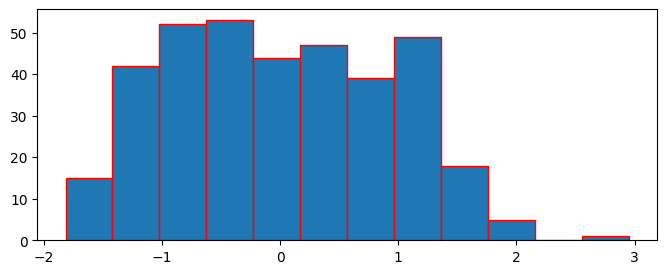

In [24]:
# Residual Chart（Hist）

y_pred = model.predict(X)
resi = y - y_pred

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 3))
plt.hist(resi, bins = 12, edgecolor = 'red')
plt.show()

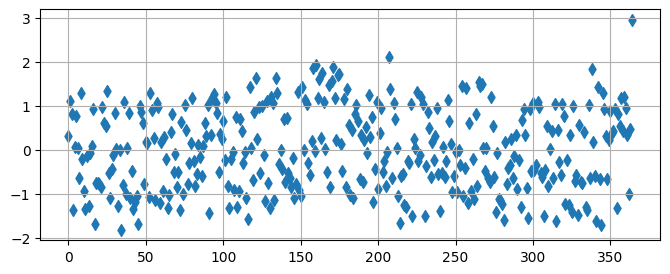

In [23]:
# Residual Chart（Scatter）

import matplotlib.pyplot as plt

y_pred = model.predict(X)
resi = y - y_pred

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 3))
plt.scatter(range(len(resi)), resi, marker = 'd')
plt.grid()
plt.show()

## Keras_API_Regression

In [45]:
import pandas as pd
data = pd.read_csv('Lemonade.csv')
data[:9]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18
5,06/01/2017,Friday,25.3,1.54,23,0.3,11
6,07/01/2017,Saturday,32.9,1.54,19,0.3,13
7,08/01/2017,Sunday,37.5,1.18,28,0.3,15
8,09/01/2017,Monday,38.1,1.18,20,0.3,17


In [46]:
X, y = data.iloc[:, -5:-1].values, data.iloc[:, [-1]].values
X.shape, y.shape

((365, 4), (365, 1))

In [47]:
# Split data to train & test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292, 4), (73, 4), (292, 1), (73, 1))

In [48]:
# INPUT --> DENSE --> OUTPUT

from keras.models import Sequential # 預先匯入一個MODEL框架
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (4, ))) # 將圖片4, --> 128（神經元）輸出
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # 直接輸出數字就可以，無須啟動(softmax)函數去判斷yes|no
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               640       
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 編譯模型：指定使用什麼優化器，計算偏差Loss：量測精準度
# https://keras.io/api/losses/regression_losses/
model.compile(optimizer = 'adam', loss = 'mse')
# MeanSquaredLogarithmicError

In [50]:
train_history = model.fit(X_train, y_train, 
                          batch_size = 10,
                          epochs = 100,
                          verbose = 1, # 顯示過程
                          validation_data = [X_test, y_test])

Epoch 1/100
30/30 [==============================] - 0s 5ms/step - loss: 65.8579 - val_loss: 5.0351
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 2.9789 - val_loss: 1.6264
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 1.4286 - val_loss: 1.0974
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 1.1153 - val_loss: 0.9294
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0084 - val_loss: 0.8643
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9561 - val_loss: 0.8550
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9543 - val_loss: 0.8604
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9545 - val_loss: 0.8753
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9504 - val_loss: 0.8393
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9482 - val_loss: 0.8243
Epoch 11

30/30 [==============================] - 0s 4ms/step - loss: 0.8637 - val_loss: 0.8230
Epoch 84/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9222 - val_loss: 0.8234
Epoch 85/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9142 - val_loss: 0.8861
Epoch 86/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9290 - val_loss: 0.8181
Epoch 87/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9986 - val_loss: 0.9724
Epoch 88/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9744 - val_loss: 0.8605
Epoch 89/100
30/30 [==============================] - 0s 5ms/step - loss: 1.0167 - val_loss: 0.8163
Epoch 90/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9753 - val_loss: 0.9417
Epoch 91/100
30/30 [==============================] - 0s 4ms/step - loss: 1.2493 - val_loss: 1.0547
Epoch 92/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9521 - val_loss: 0.8155
Epoch 93/100


In [51]:
train_history.history.keys()

dict_keys(['loss', 'val_loss'])

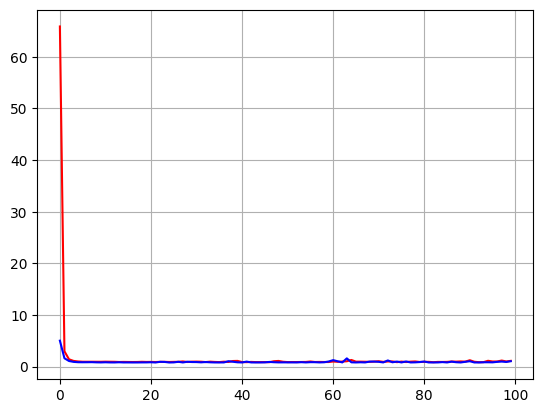

In [52]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

In [53]:
import numpy as np
np.average((model.predict(X_test) - y_test) ** 2), np.average((model.predict(X_train) - y_train) ** 2)

(1.0592403328000355, 1.1161118655266968)

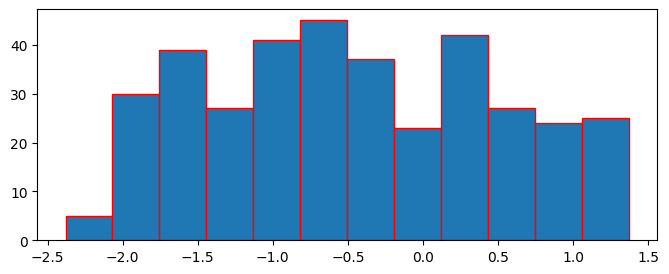

In [54]:
# Residuals Chart

y_pred = model.predict(X)
resi = (y - y_pred)

import matplotlib.pyplot as plt
plt.figure(figsize = (8, 3))
plt.hist(resi, bins = 12, edgecolor = 'red')
plt.show()

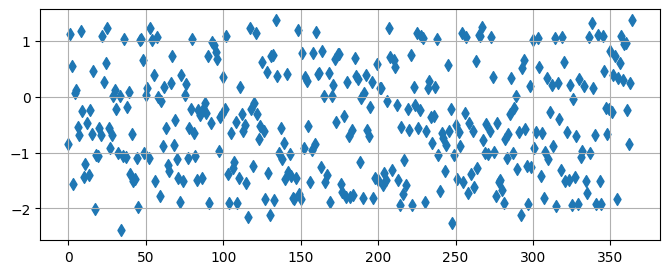

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 3))
plt.scatter(range(len(resi)), resi, marker = 'd')
plt.grid()
plt.show()

In [56]:
# mse
# rmse

import numpy as np
np.average(resi ** 2), np.sqrt(np.mean(resi ** 2))

(1.1047375170497324, 1.0510649442587896)